#### Importing required libraries and setting display options

This block imports pandas, matplotlib, seaborn, and scipy's zscore for data analysis and visualization. It also configures pandas to display all columns in DataFrame outputs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from scipy.stats import zscore

#### (Optional) Convert CSV to Parquet

This block (commented out) demonstrates how to read the original CSV, convert the `CapitalOutstanding` column to numeric, and save the DataFrame as a Parquet file for faster loading.

In [2]:
# df = pd.read_csv("../../data/MachineLearningRating_v3.txt", sep="|", encoding="utf-8")
# df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
# df.to_parquet("../../data/MachineLearningRating_v3.parquet")

#### Load data from Parquet

Loads the preprocessed insurance dataset from a Parquet file into a pandas DataFrame.

In [59]:
df = pd.read_parquet("../../data/MachineLearningRating_v3.parquet")

#### Data overview

Displays information about the DataFrame, including column types and non-null counts.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 54 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1000098 non-null  int64  
 1   UnderwrittenCoverID       1000098 non-null  int64  
 2   PolicyID                  1000098 non-null  int64  
 3   TransactionMonth          1000098 non-null  object 
 4   IsVATRegistered           1000098 non-null  bool   
 5   Citizenship               1000098 non-null  object 
 6   LegalType                 1000098 non-null  object 
 7   Title                     1000098 non-null  object 
 8   Language                  1000098 non-null  object 
 9   Bank                      854137 non-null   object 
 10  AccountType               959866 non-null   object 
 11  MaritalStatus             991839 non-null   object 
 12  Gender                    990562 non-null   object 
 13  Country                   1

#### Summary statistics for key numeric columns

Shows descriptive statistics for `SumInsured`, `CalculatedPremiumPerTerm`, `TotalPremium`, and `TotalClaims`.

In [5]:
df[['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']].describe()

,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


#### Remove negative values

Filters out rows where `TotalPremium` or `TotalClaims` are negative.

In [63]:
df = df[df['TotalPremium'] >= 0]
df = df[df['TotalClaims'] >= 0]

#### Outlier filtering using Z-score

Calculates the Z-score for `TotalPremium` and filters out rows with absolute Z-score >= 3 to remove outliers.

In [108]:
df['Z_Score'] = zscore(df['TotalPremium'])

df_filtered = df[df['Z_Score'].abs() < 3]

#### Data shape after outlier removal

Displays the shape of the filtered DataFrame.

In [109]:
df_filtered.shape

(987346, 54)

#### Handle missing data, check duplicates, and convert categorical columns

Drops rows with missing `TotalPremium` or `TotalClaims`, checks for duplicates, and converts `Province`, `Gender`, and `Title` to categorical types.

In [103]:
# Handling missing data
df_filtered.dropna(subset=['TotalPremium', 'TotalClaims'], inplace=True)  # Dropping rows with missing financial data

# Check for duplicate records
print("Duplicates:", df_filtered.duplicated().sum())

# Convert categorical columns
df_filtered['Province'] = df_filtered['Province'].astype("category")
df_filtered['Gender'] = df_filtered['Gender'].astype("category")
df_filtered['Title'] = df_filtered['Title'].astype("category")

Duplicates: 0


/tmp/ipykernel_2662372/402793308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['TotalPremium', 'TotalClaims'], inplace=True)  # Dropping rows with missing financial data


#### Distribution of Total Premium

Plots a histogram of the `TotalPremium` column (after outlier removal).

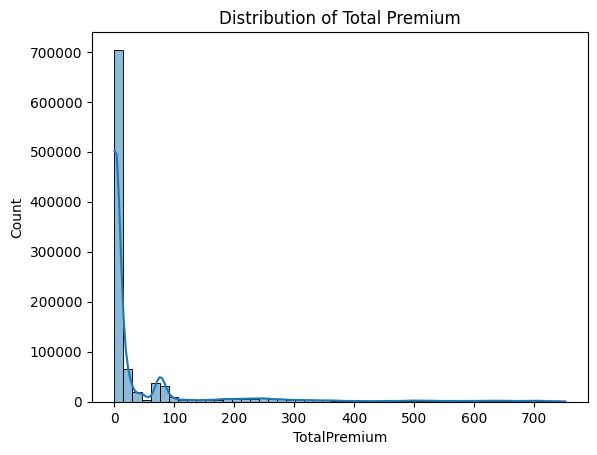

In [70]:
# Histogram for TotalPremium
sns.histplot(df_filtered['TotalPremium'], bins=50, kde=True)
plt.title("Distribution of Total Premium")
plt.show()



#### Distribution of Calculated Premium Per Term

Plots a histogram of the `CalculatedPremiumPerTerm` column (after outlier removal).

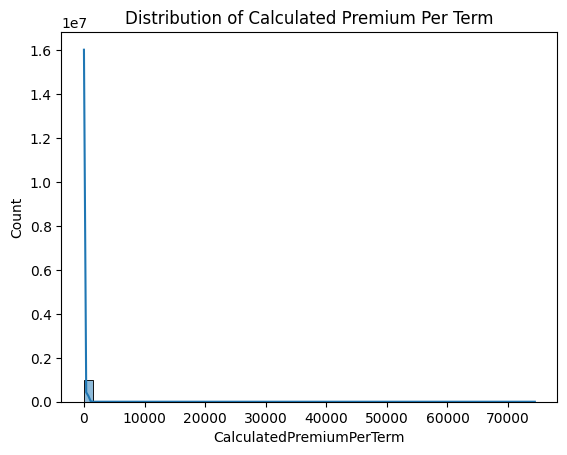

In [72]:
# Histogram for CalculatedPremiumPerTerm
sns.histplot(df_filtered['CalculatedPremiumPerTerm'], bins=50, kde=True)
plt.title("Distribution of Calculated Premium Per Term")
plt.show()

#### Distribution of Gender

Plots a countplot showing the distribution of the `Gender` column.

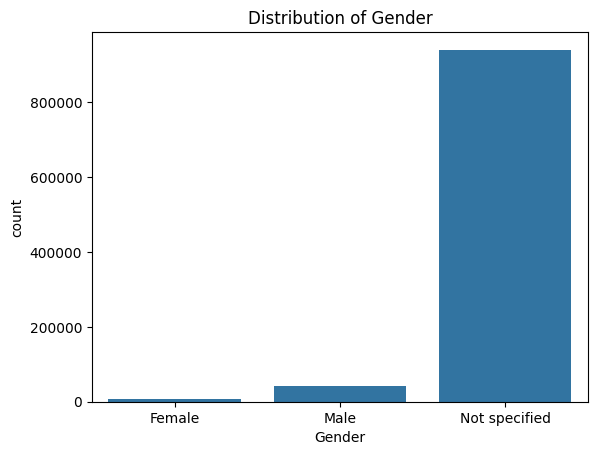

In [ ]:
# Countplot for categorical data (Gender)
sns.countplot(x=df_filtered['Gender'])
plt.title("Distribution of Gender")
plt.show()

#### Convert TransactionMonth to datetime

Converts the `TransactionMonth` column to pandas datetime format.

In [ ]:
# Convert to datetime format
df['TransactionMonth'] = pd.to_datetime(df_filtered['TransactionMonth'])

#### Ensure numeric columns

Converts relevant columns to numeric types, coercing errors to NaN.

In [ ]:
# Clean all columns that should be numeric
for col in ['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims', 'CapitalOutstanding']:
    if col in df_filtered.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


#### Claim severity across vehicle types

Displays a boxplot of `SumInsured` grouped by `VehicleType`.

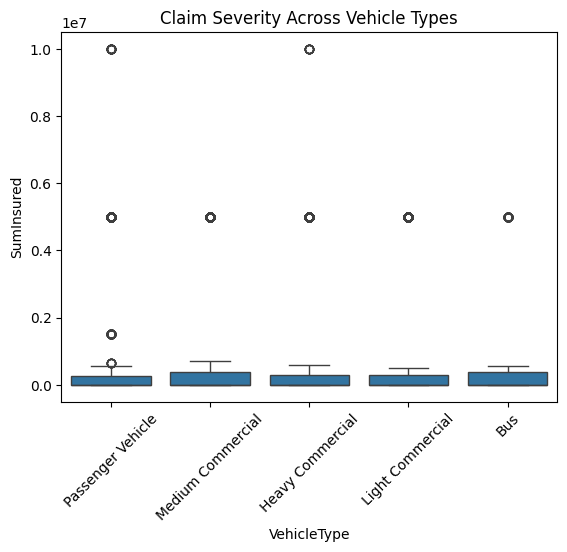

In [ ]:
# Claim severity vs. VehicleType
sns.boxplot(x=df_filtered['VehicleType'], y=df_filtered['SumInsured'])
plt.xticks(rotation=45)
plt.title("Claim Severity Across Vehicle Types")
plt.show()

#### Total Premium by Gender

Plots a barplot comparing `TotalPremium` across genders.

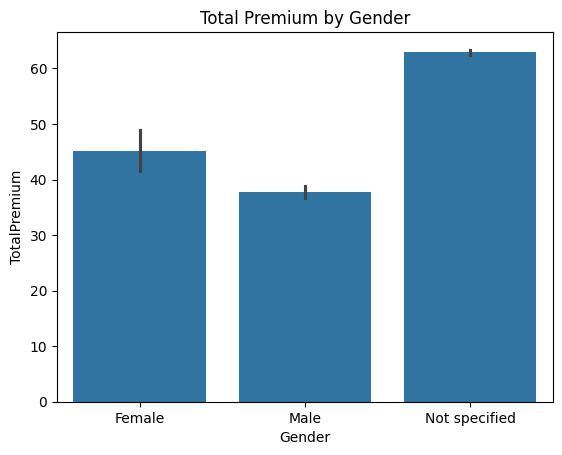

In [ ]:
# Premium vs. Gender (risk comparison)
sns.barplot(x=df_filtered["Gender"], y=df_filtered["TotalPremium"])
plt.title("Total Premium by Gender")
plt.show()

#### Claim amount trend over time

Plots a line chart showing the trend of `TotalClaims` over `TransactionMonth`.

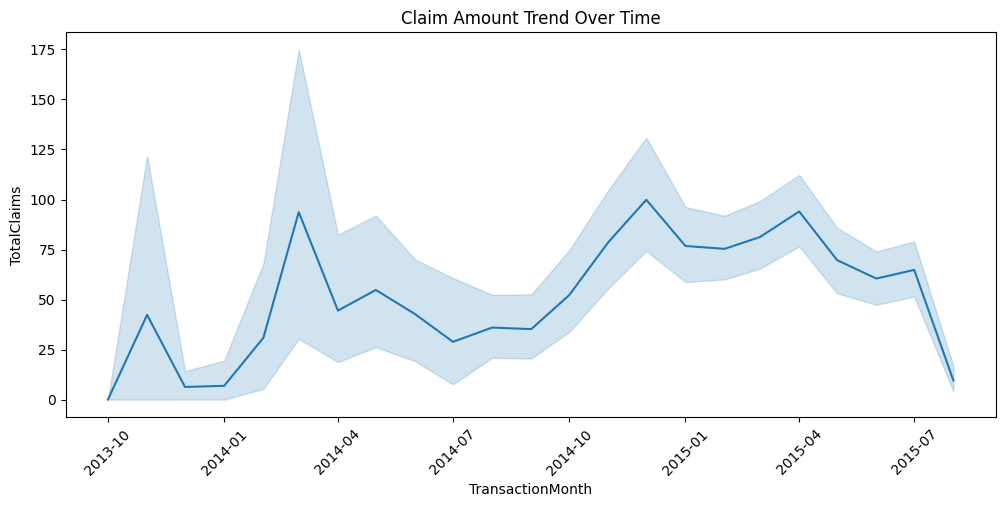

In [ ]:
# Line plot for Claim Amounts over time
plt.figure(figsize=(12,5))
sns.lineplot(x=df_filtered['TransactionMonth'], y=df_filtered['TotalClaims'])
plt.title("Claim Amount Trend Over Time")
plt.xticks(rotation=45)
plt.show()

#### Calculate overall loss ratio

Computes and prints the overall loss ratio (total claims divided by total premiums).

In [ ]:
# Calculate overall Loss Ratio
overall_loss_ratio = df_filtered['TotalClaims'].sum() / df_filtered['TotalPremium'].sum()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}")


Overall Loss Ratio: 1.05


#### Loss ratio grouped by province

Calculates and displays the loss ratio for each province.

In [ ]:
# Loss Ratio grouped by Province
loss_ratio_province = df_filtered.groupby('Province', observed=False).apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum(), include_groups=False).reset_index()
loss_ratio_province.columns = ['Province', 'LossRatio']

# Display results
print(loss_ratio_province.sort_values(by='LossRatio', ascending=False))


        Province  LossRatio
2        Gauteng   1.222505
3  KwaZulu-Natal   1.080509
8   Western Cape   1.059730
6     North West   0.790367
5     Mpumalanga   0.721147
1     Free State   0.680758
4        Limpopo   0.661199
0   Eastern Cape   0.633755
7  Northern Cape   0.282699


#### Loss ratio by gender

Calculates and displays the loss ratio for each gender.

In [ ]:
# Loss Ratio by Gender
loss_ratio_gender = df_filtered.groupby('Gender', observed=False).apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum(), include_groups=False).reset_index()
loss_ratio_gender.columns = ['Gender', 'LossRatio']

# Display results
print(loss_ratio_gender)

          Gender  LossRatio
0         Female   0.821879
1           Male   0.869344
2  Not specified   1.059557


#### Loss ratio by province (barplot)

Plots a barplot of loss ratios for each province.

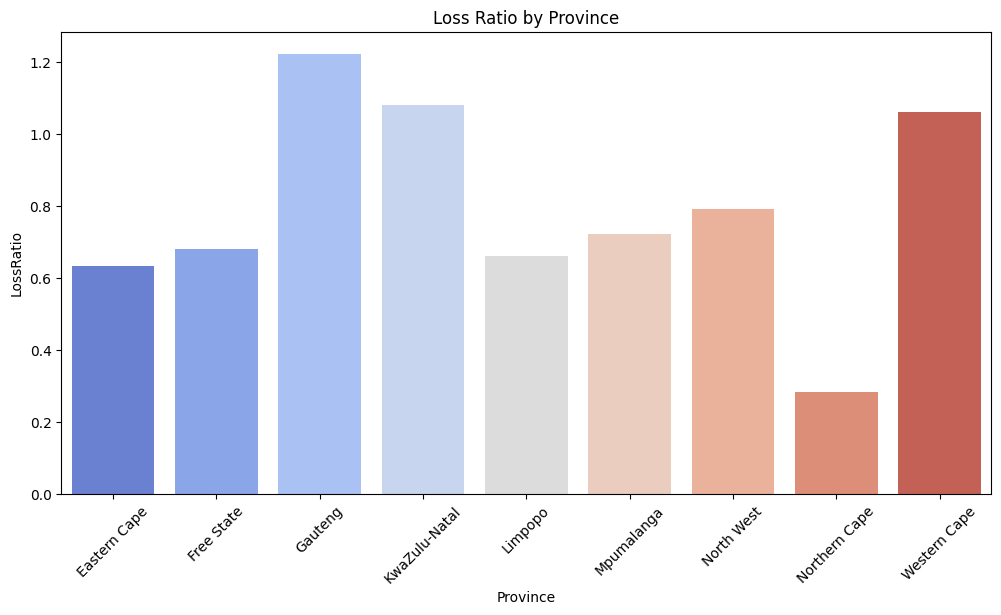

In [91]:
# Province Loss Ratio Plot
plt.figure(figsize=(12,6))
sns.barplot(x=loss_ratio_province['Province'], y=loss_ratio_province['LossRatio'], palette='coolwarm', hue=loss_ratio_province['Province'], legend=False)
plt.xticks(rotation=45)
plt.title("Loss Ratio by Province")
plt.show()

#### Loss ratio by gender (barplot)

Plots a barplot of loss ratios for each gender.

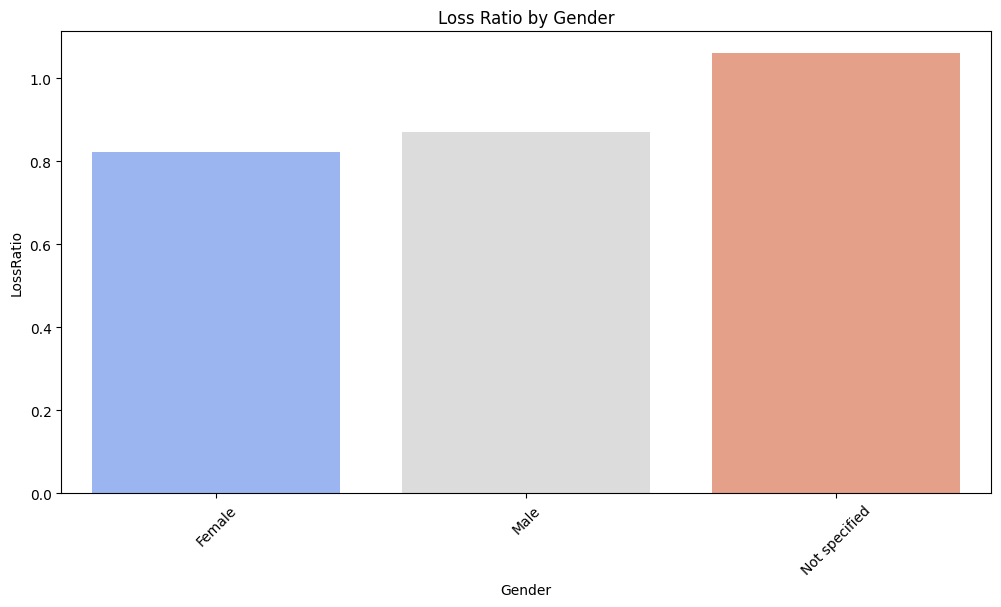

In [100]:
# Province Loss Ratio Plot
plt.figure(figsize=(12,6))
sns.barplot(x=loss_ratio_gender['Gender'], y=loss_ratio_gender['LossRatio'], palette='coolwarm', hue=loss_ratio_gender['Gender'], legend=False)
plt.xticks(rotation=45)
plt.title("Loss Ratio by Gender")
plt.show()

#### Claims by vehicle make and model

Groups data by vehicle make and model, calculates total claims, and displays the top and bottom 10.

In [ ]:
# Group by Vehicle Make & Model and calculate total claims
claims_by_vehicle = df_filtered.groupby(['make', 'Model'])['TotalClaims'].sum().reset_index()

# Sort results to find highest and lowest claim amounts
highest_claims = claims_by_vehicle.sort_values(by='TotalClaims', ascending=False).head(10)
lowest_claims = claims_by_vehicle.sort_values(by='TotalClaims', ascending=True).head(10)

print("Top 10 Vehicle Makes/Models with Highest Claim Amounts:")
print(highest_claims)

print("\nTop 10 Vehicle Makes/Models with Lowest Claim Amounts:")
print(lowest_claims)

Top 10 Vehicle Makes/Models with Highest Claim Amounts:
              make                             Model   TotalClaims
321         TOYOTA         QUANTUM 2.7 SESFIKILE 16s  1.204951e+07
320         TOYOTA         QUANTUM 2.7 SESFIKILE 15s  1.151742e+07
319         TOYOTA         QUANTUM 2.7 SESFIKILE 14s  9.968400e+06
315         TOYOTA    QUANTUM 2.5 D-4D SESFIKILE 16s  7.733236e+06
308         TOYOTA             HiACE SUPER 16 F/Lift  3.275205e+06
305         TOYOTA                      HiACE SIYAYA  1.727756e+06
313         TOYOTA          QUANTUM 2.5 D-4D 14 SEAT  1.339541e+06
45             CMC                       AMANDLA 2.2  1.106007e+06
259         TOYOTA                     AVANZA 1.5 SX  1.089785e+06
179  MERCEDES-BENZ  SPRINTER 515 CDi HI-ROOF F/C P/V  8.874161e+05

Top 10 Vehicle Makes/Models with Lowest Claim Amounts:
        make                            Model  TotalClaims
233  PEUGEOT     BOXER L2H1 2.2 HDi M F/C P/V          0.0
221   NISSAN        PRIMASTAR 1.9

#### Vehicles with highest claim amounts

Plots a barplot of the top 10 vehicle makes with the highest total claims.

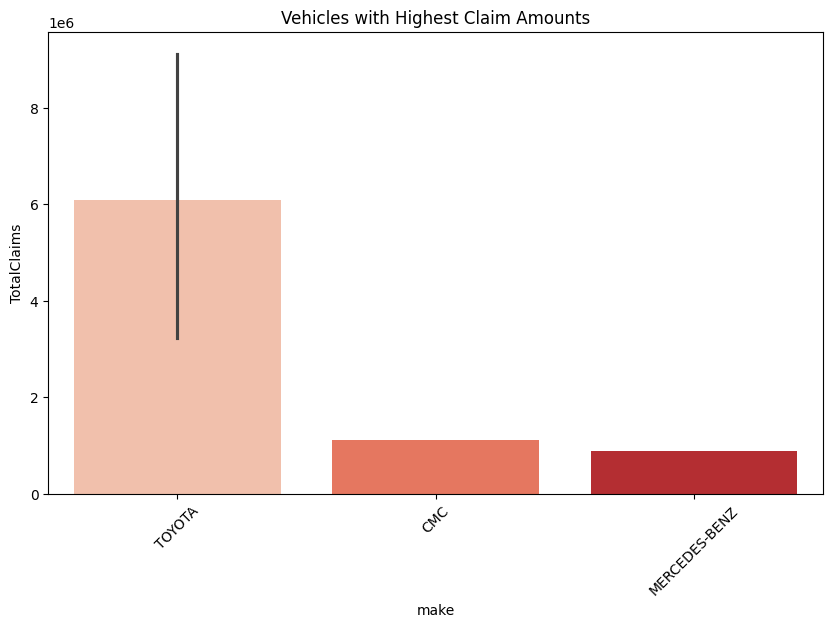

In [96]:
# Plot top vehicle makes with highest claims
plt.figure(figsize=(10,6))
sns.barplot(x=highest_claims['make'], y=highest_claims['TotalClaims'], palette='Reds', hue=highest_claims['make'], legend=False)
plt.xticks(rotation=45)
plt.title("Vehicles with Highest Claim Amounts")
plt.show()


In [110]:
df_filtered.to_parquet('../../data/clean_data.parquet', index=False)